透射光譜
1.計算通量光譜的大小(從光源開始)
2.長度設定1微米 光子晶體週期1微米
3.整體結構由一塊波導加上2N個孔組合而成

In [1]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video

In [2]:
resolution = 20  # 解析度

eps = 13 #介電系數
w = 1.2  #波導厚度
r = 0.36 #控的半徑 
d = 1.4  #缺陷(孔)的間距 (正常設定為1)
N = 3    #缺陷兩側的孔數

sy = 6   # y方向的大小
pad = 2  # 最後的孔和pml的距離
dpml = 1 # PML 厚度

sx = 2 * (pad + dpml + N) + d - 1 # x方向大小 

In [3]:
cell = mp.Vector3(sx, sy, 0)

整體結構由一塊波導加上2N個孔組合而成

In [4]:
blk = mp.Block(size=mp.Vector3(mp.inf, w, mp.inf), material=mp.Medium(epsilon=eps))
geometry = [blk]

for i in range(N):
    geometry.append(mp.Cylinder(r, center=mp.Vector3(d / 2 + i)))
    geometry.append(mp.Cylinder(r, center=mp.Vector3(-(d / 2 + i))))

從之前的計算已知0.2到0.3的頻率範圍有Hz的極化帶

In [5]:
pml_layers = [mp.PML(1.0)]

fcen = 0.3
df = 0.2

In [6]:
src = [mp.Source( mp.GaussianSource(fcen, fwidth = df),
                  component = mp.Ey,
                  center = mp.Vector3(-0.5 * sx + dpml),
                  size = mp.Vector3(0, w),)
      ]

In [7]:
sym = [mp.Mirror(mp.Y, phase=-1)]
sim = mp.Simulation(cell_size = cell,
                    geometry = geometry,
                    boundary_layers = pml_layers,
                    sources = src,
                    symmetries = sym,
                    resolution = resolution,
                    )

In [8]:
freg = mp.FluxRegion(
    center=mp.Vector3(0.5 * sx - dpml - 0.5), size=mp.Vector3(0, 2 * w)
)

nfreq = 500  


trans = sim.add_flux(fcen, df, nfreq, freg)

/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant eps

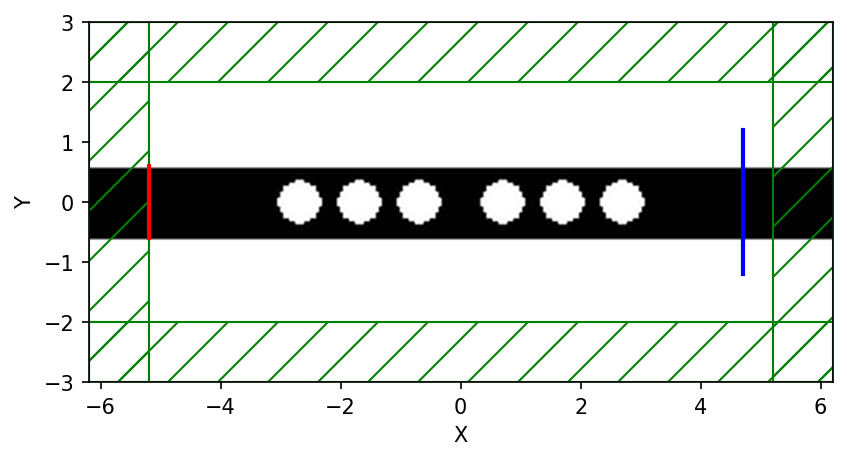

In [9]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.show()

In [10]:
f = plt.figure(dpi=150)
animate = mp.Animate2D(sim, f=f, fields=mp.Hz, realtime=False, normalize=True)

sim.run(
    mp.during_sources(mp.at_every(0.4, animate)),
    until_after_sources=mp.stop_when_fields_decayed(
        50, mp.Ey, mp.Vector3(0.5 * sx - dpml - 0.5), 1e-3
    ),
)
plt.close()

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.0228169 s
Working in 2D dimensions.
Computational cell is 12.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (2.7,0,0)
          radius 0.36,

先運行一個沒有孔徑的通量

In [11]:
def sim_cavity(N=3, sy=6):
    sx = 2 * (pad + dpml + N) + d - 1  
    cell = mp.Vector3(sx, sy, 0)
    blk = mp.Block(size=mp.Vector3(mp.inf, w, mp.inf), material=mp.Medium(epsilon=eps))
    geometry = [blk]

    for i in range(N):
        geometry.append(mp.Cylinder(r, center=mp.Vector3(d / 2 + i)))
        geometry.append(mp.Cylinder(r, center=mp.Vector3(-(d / 2 + i))))

    src = [
        mp.Source(
            mp.GaussianSource(fcen, fwidth=df),
            component=mp.Ey,
            center=mp.Vector3(-0.5 * sx + dpml),
            size=mp.Vector3(0, w),
        )
    ]

    sim = mp.Simulation(
        cell_size=cell,
        geometry=geometry,
        boundary_layers=pml_layers,
        sources=src,
        symmetries=sym,
        resolution=resolution,
    )

    freg = mp.FluxRegion(
        center=mp.Vector3(0.5 * sx - dpml - 0.5), size=mp.Vector3(0, 2 * w)
    )
    nfreq = 500
    trans = sim.add_flux(fcen, df, nfreq, freg)

    sim.run(
        until_after_sources=mp.stop_when_fields_decayed(
            50, mp.Ey, mp.Vector3(0.5 * sx - dpml - 0.5), 1e-3
        )
    )

    freqs = mp.get_flux_freqs(trans)
    psd = mp.get_fluxes(trans)

    return freqs, psd

In [12]:
freqs_wg, psd_wg = sim_cavity(N=0)  # simple waveguide
freqs_cav, psd_cav = sim_cavity()  # cavity

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000921011 s
Working in 2D dimensions.
Computational cell is 6.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
time for set_epsilon = 0.0362799 s
-----------
field decay(t = 50.025000000000006): 0.026749452185936936 / 0.026749452185936936 = 1.0
field decay(t = 100.05000000000001): 0.000379219969006999 / 0.026749452185936936 = 0.01417673776535758
field decay(t = 150.07500000000002): 9.813683985301802e-14 / 0.026749452185936936 = 3.668742042673e-12
run 0 finished at t = 150.07500000000002 (6003 timesteps)
-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000954866 s
Working in 2D dimensions.
Computational cell is 12.4 x 6 x 0 with resolution 20
     block, center = (

Text(0, 0.5, 'Transmission')

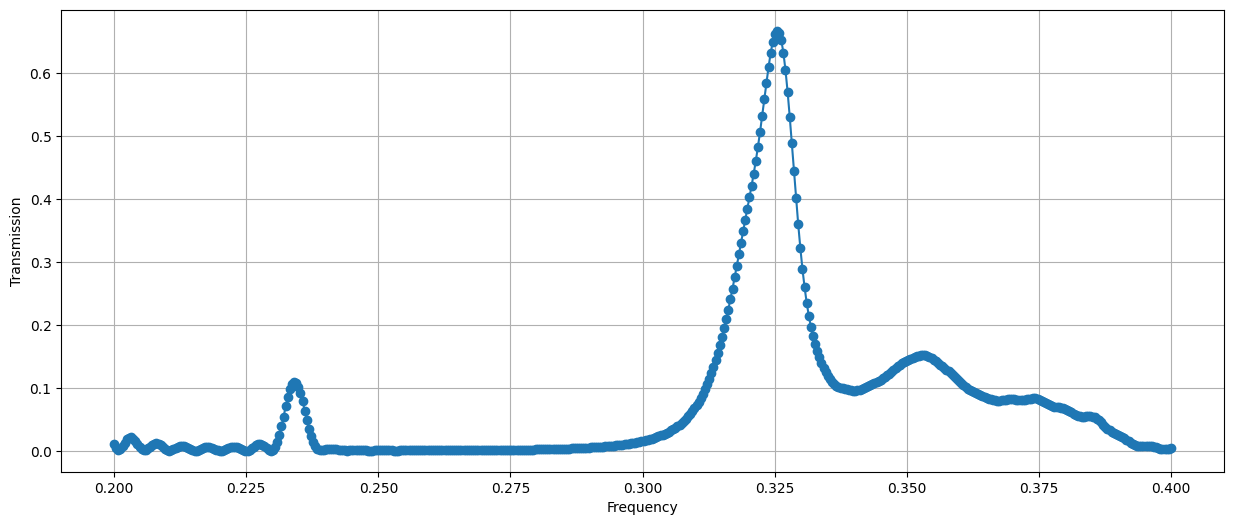

In [13]:
fig = plt.figure(figsize=(15, 6), dpi=100)
ax = fig.add_subplot(111)
plt.plot(freqs_cav, np.array(psd_cav) / np.array(psd_wg), "o-")
plt.grid(True)
plt.xlabel("Frequency")
plt.ylabel("Transmission")



原本業預期在0.2到0.3間有band gap，而中間凸起的共振模態對應於圓孔兼具放大缺陷

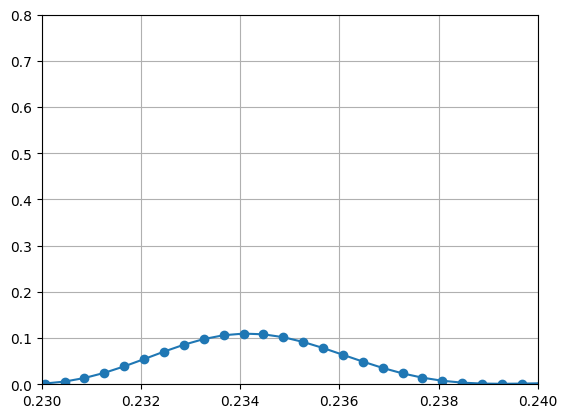

In [15]:
ax2 = fig.add_axes([0.52, 0.6, 0.2, 0.25])
plt.plot(freqs_cav, np.array(psd_cav) / np.array(psd_wg), "o-")
plt.xlim(0.23, 0.24)
plt.ylim(0, 0.8)
plt.grid(True)